In [1]:
!pip install --upgrade opencv-python

  Using cached opencv_python-4.8.1.78-cp37-abi3-macosx_10_16_x86_64.whl (54.7 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5.62
    Uninstalling opencv-python-4.5.5.62:
      Successfully uninstalled opencv-python-4.5.5.62
You should consider upgrading via the '/Users/tuoboyuan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


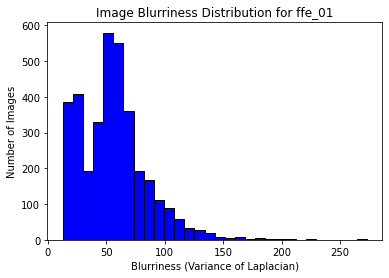

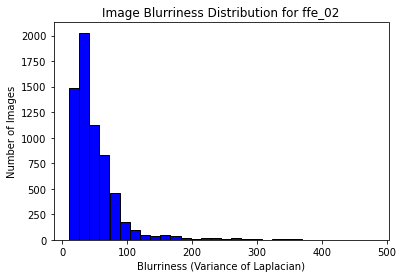

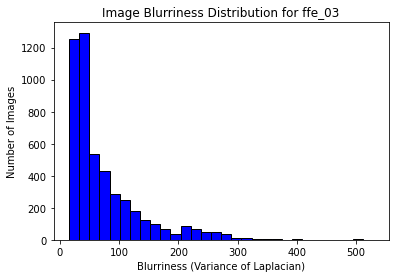

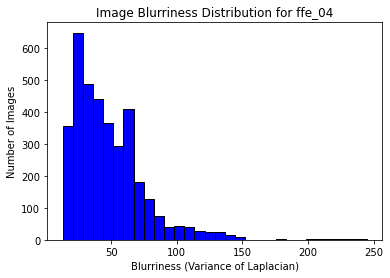

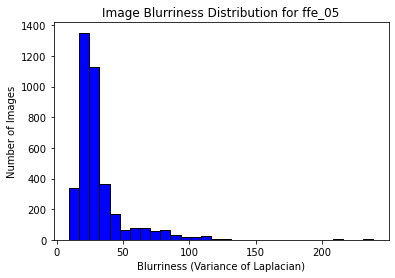

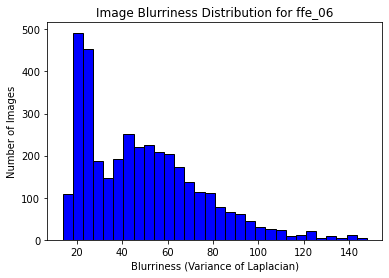

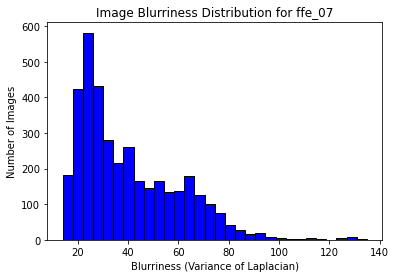

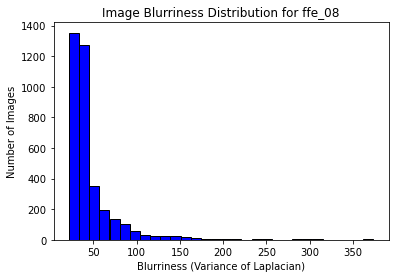

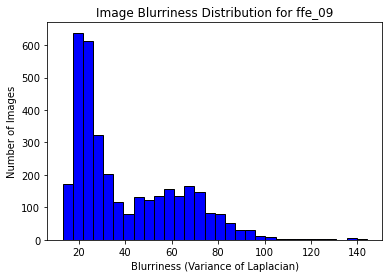

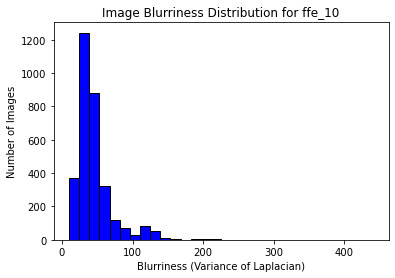

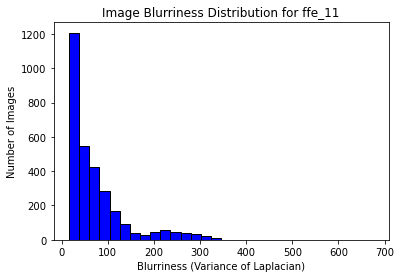

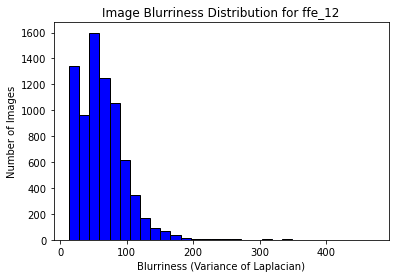

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def calculate_blurriness(image):
    # Convert to grayscale image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate Laplacian variance
    variance_of_laplacian = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance_of_laplacian

main_folder_path = 'data/FFE/2023-7-21'

for subfolder in sorted(os.listdir(main_folder_path)):
    if subfolder.startswith('ffe_'):
        blurriness_data = []
        
        folder_path = os.path.join(main_folder_path, subfolder)

        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                blurriness = calculate_blurriness(image)
                blurriness_data.append(blurriness)

        plt.figure()
        plt.hist(blurriness_data, bins=30, color='blue', edgecolor='black')
        plt.title(f'Image Blurriness Distribution for {subfolder}')
        plt.xlabel('Blurriness (Variance of Laplacian)')
        plt.ylabel('Number of Images')
        plt.show()

In [34]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def calculate_blurriness(image):
    # Convert to grayscale image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate Laplacian variance
    variance_of_laplacian = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance_of_laplacian

main_folder_path = 'data/FFE/2023-7-21'
lower_count = 0
higher_count = 0

for subfolder in sorted(os.listdir(main_folder_path)):
    if subfolder.startswith('ffe_09'):
        blurriness_data = []
        
        folder_path = os.path.join(main_folder_path, subfolder)

        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                blurriness = calculate_blurriness(image)
                if blurriness <= 55:
                    lower_count += 1
                else:
                    higher_count += 1
                    
print(f"lower_count is {lower_count}")
print(f"higher_count is {higher_count}")

lower_count is 2488
higher_count is 975


data/FFE/2023-7-21/ffe_09/20230720124643288.jpg
Blurriness score for ffe_09/20230720124643288.jpg: 74.73941012142924


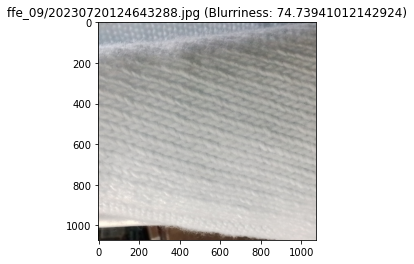

data/FFE/2023-7-21/ffe_09/20230720124643420.jpg
Blurriness score for ffe_09/20230720124643420.jpg: 55.29552203396691


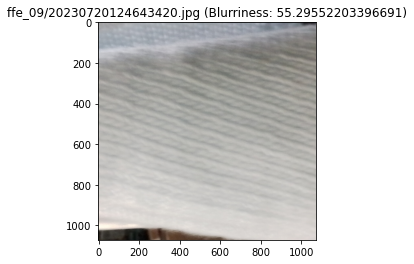

In [36]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def calculate_blurriness(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance_of_laplacian = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance_of_laplacian

folder_path = 'data/FFE/2023-7-21/'
# image_names = ['ffe_05/20230720120631522.jpg', 'ffe_05/20230720120637706.jpg']
image_names = ['ffe_09/20230720124643288.jpg', 'ffe_09/20230720124643420.jpg']
for image_name in image_names:
    image_path = os.path.join(folder_path, image_name)
    print(image_path)
    image = cv2.imread(image_path)
    blurriness = calculate_blurriness(image)

    print(f'Blurriness score for {image_name}: {blurriness}')
    
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'{image_name} (Blurriness: {blurriness})')
    plt.show()

In [26]:
!pwd
image_path = "FFE/2023-7-21/ffe_09/20230615143534865.jpg"
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

/Users/tuoboyuan/robotic-arm-polyu


[ WARN:0@255452.914] global loadsave.cpp:248 findDecoder imread_('FFE/2023-7-21/ffe_09/20230615143534865.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


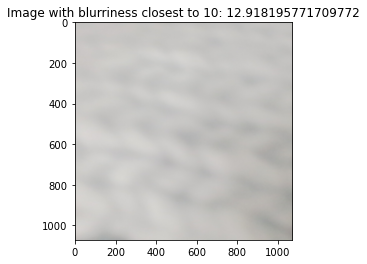

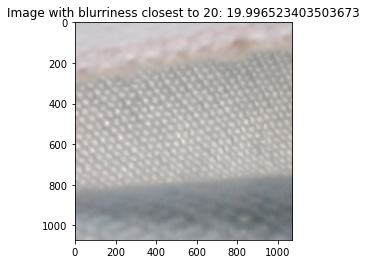

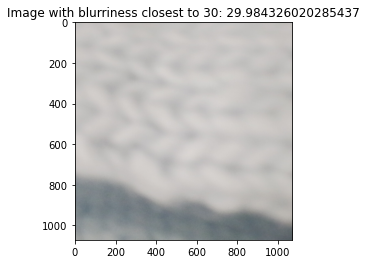

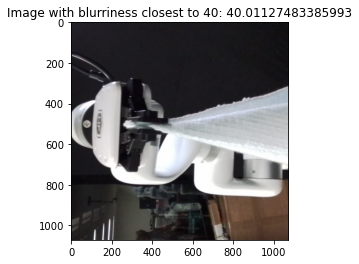

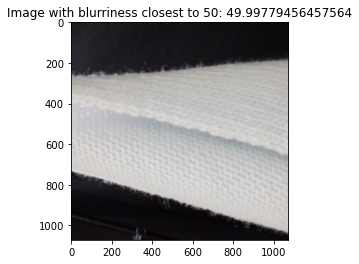

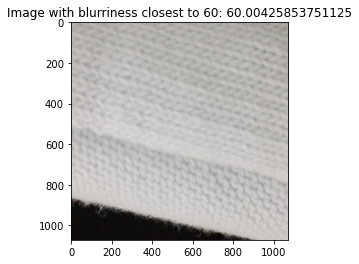

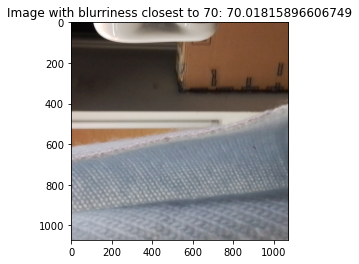

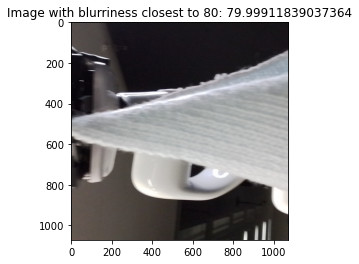

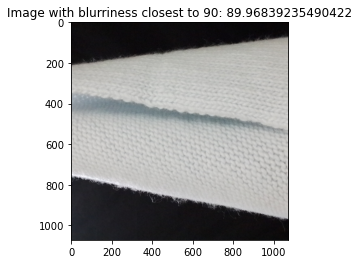

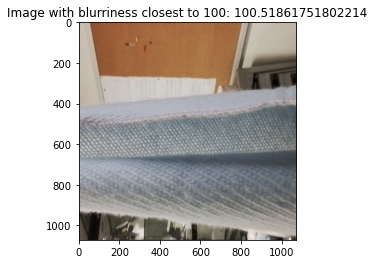

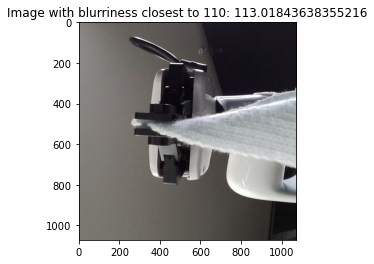

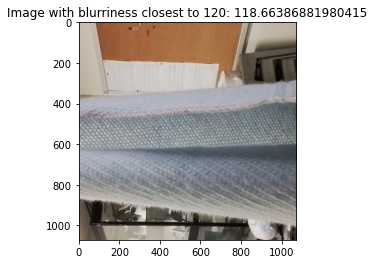

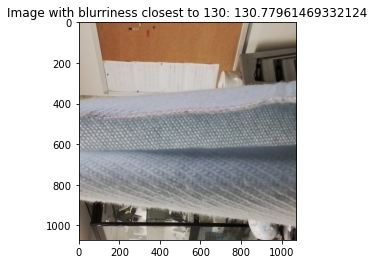

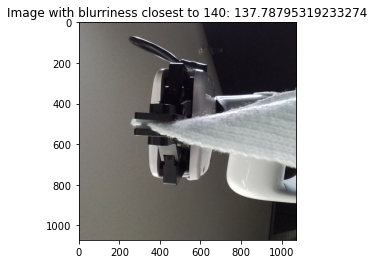

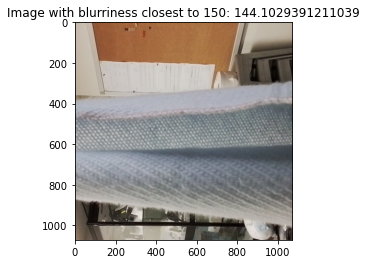

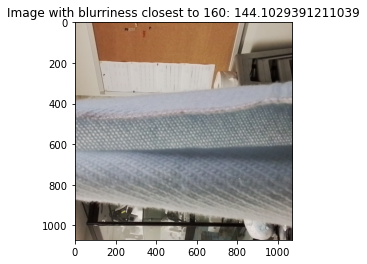

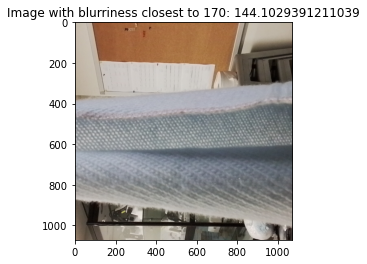

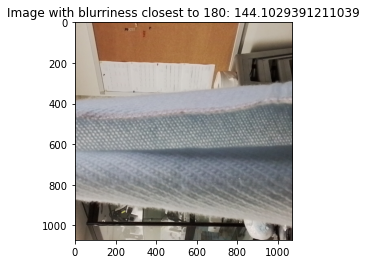

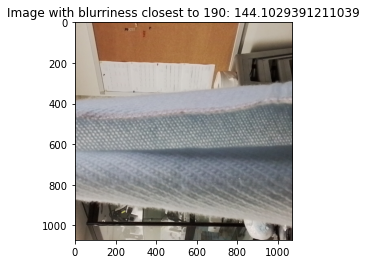

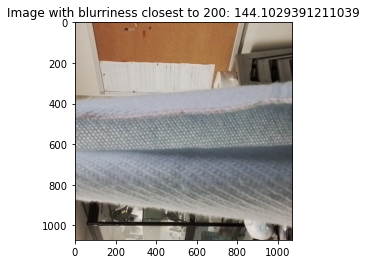

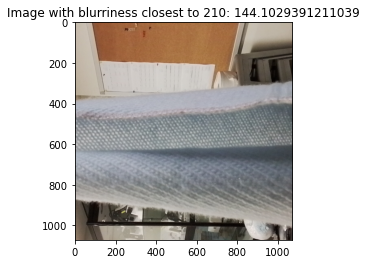

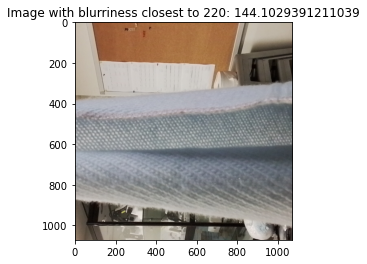

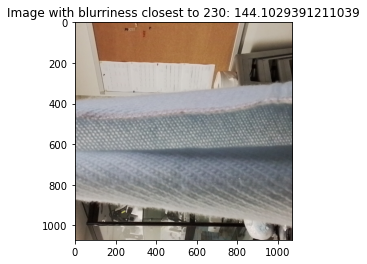

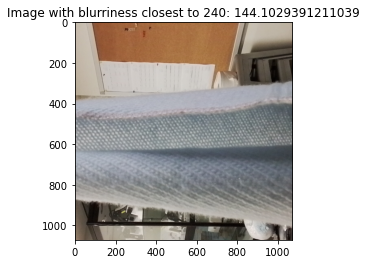

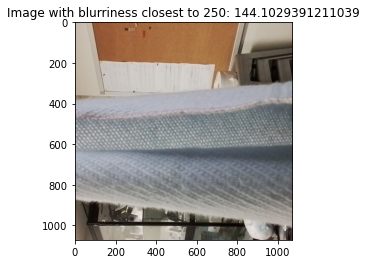

In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def calculate_blurriness(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance_of_laplacian = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance_of_laplacian

folder_path = 'data/FFE/2023-7-21/ffe_09'

blurriness_dict = {}

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        blurriness = calculate_blurriness(image)
        blurriness_dict[blurriness] = image_path

sorted_blurriness = sorted(blurriness_dict.keys())

for i in range(10, 260, 10):
    closest_blurriness = min(sorted_blurriness, key=lambda x: abs(x - i))
    image_path = blurriness_dict[closest_blurriness]
    image = cv2.imread(image_path)
    if image is not None:
        plt.figure(figsize=(4, 4))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f'Image with blurriness closest to {i}: {closest_blurriness}')
        plt.show()
    else:
        print(f"No image found for blurriness closest to {i}")